# Descriptive Statistics and Data Visualization
This notebook covers exploratory analysis for 430 features<br>
coming from 9 different categories of clinical data<br>
The analysis will include three steps:<br>
1. Extract Descriptive Statistics for each feature
2. Visualize the distribution 
3. Brief Summary of Findings

<br>

| Table Name |variable prefix|columns |DType |Description | 
| :--- | :--- | :--- | :--- | :--- |
| Research Session Attendance|rsa_|25 |Binary|Records attendence for each week of treatment | 
| Demographics|dem_|10 |Categorical|Sex, Ethnicity, Race | 
| Urine Drug Screen| test_|225|Binary  |Drug test for 8 different drug classes, taken weekly for 24 weeks | 
| DSM-IV Diagnosis|dsm_|6|Categorical |Tracks clinical diagnosis for substance use disorder, in accordance with DSM guidelines| 
| Medical and Psychiatric History|mdh_|18|Categorical |Tracks medical and psychiatric history of 18 different Conditions| 
| Physical Exam|pex_|12|Categorical |Tracks the appearance and condition of patients for 12 different physical observations| 
| Timeline Follow Back Survey|survey_|70|Numeric |Surveys for self reported drug use, collected every 4 weeks, records total number of instances of drug use for the previous 30 days|
| Dose Record |meds_|50|Numeric |Records the medication, averge weekly dose and week of treatment| 


In [1]:
# convert markdown table to df
import pandas as pd
import sys

def markdown_table_to_df(table):
    rows = table.strip().split('\n')
    header = rows[0].split('|')[1:-1]
    data = [row.split('|')[1:-1] for row in rows[2:]]
    df = pd.DataFrame(data, columns=header)
    return df

table = """| Table Name |variable prefix| Type |Description | 
| :--- | :--- | :--- | :--- |
| Research Session Attendance|rsa_ |Binary|Records attendence for each week of treatment | 
| Demographics|dem_ |Categorical|Sex, Ethnicity, Race | 
| Urine Drug Screen| test_|Binary  |Drug test for 8 different drug classes, taken weekly for 24 weeks | 
| DSM-IV Diagnosis|dsm_|Categorical |Tracks clinical diagnosis for substance use disorder, in accordance with DSM guidelines| 
| Medical and Psychiatric History|mdh_|Categorical |Tracks medical and psychiatric history of 18 different Conditions| 
| Physical Exam|pex_|Categorical |Tracks the appearance and condition of patients for 12 different physical observations| 
| Timeline Follow Back Survey|survey_|Numeric |Surveys for self reported drug use, collected every 4 weeks, includes previous 30 days of use ot week 0, 4, 8, 12, 16, 20, 24| 
| Dose Record |meds_|Numeric |Records the medication, averge weekly dose and week of treatment| 
"""

df = markdown_table_to_df(table)

df

,Table Name,variable prefix,Type,Description
0,Research Session Attendance,rsa_,Binary,Records attendence for each week of treatment
1,Demographics,dem_,Categorical,"Sex, Ethnicity, Race"
2,Urine Drug Screen,test_,Binary,"Drug test for 8 different drug classes, taken ..."
3,DSM-IV Diagnosis,dsm_,Categorical,Tracks clinical diagnosis for substance use di...
4,Medical and Psychiatric History,mdh_,Categorical,Tracks medical and psychiatric history of 18 d...
5,Physical Exam,pex_,Categorical,Tracks the appearance and condition of patient...
6,Timeline Follow Back Survey,survey_,Numeric,"Surveys for self reported drug use, collected ..."
7,Dose Record,meds_,Numeric,"Records the medication, averge weekly dose and..."


### Import Required Libraries

In [2]:
import pandas as pd # data manipulation
import numpy as np # numerical computation
import matplotlib.pyplot as plt # visualization
import seaborn as sns # enhanced visualization
import warnings # ignore warnings
import helper # custom data transformation functions
from IPython.display import display, Markdown # display and markdown conversion
import re # regular expressions
warnings.filterwarnings('ignore') # ignore warnings

# Load the data
data = pd.read_csv('../data/merged_data.csv')

# Display the first few rows of the data
data.shape

(1917, 424)

### Review RSA: Research Session Attendence
Research Session Attendance: RSA<br>
Records attendence for 24 weeks of treatment. <br>
Recorded each week<br>

Descriptive statistics for each week of attendence:<br>
- Avg weekly attendance 851 patients per week
- Avg proportion of patients attending weekly 44%
<br>


<br>
We will plot the weekly distribution of percentage of patients attending treatment

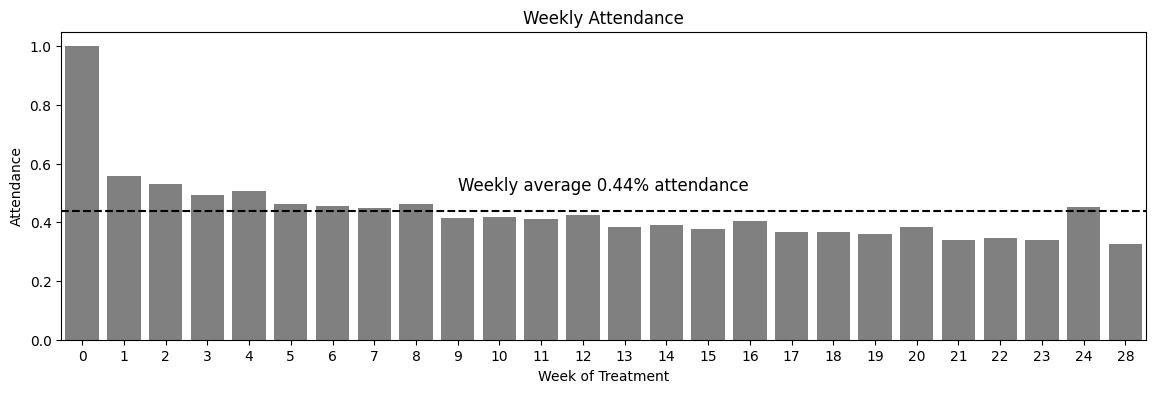

In [3]:
# create df for rsa clinical data
rsa = helper.series_func(data, 'rsa', 'mean')

# set params to plot the data series
series, title, ylabel, xlabel = rsa, 'Weekly Attendance', 'Attendance', 'Week of Treatment'

# call helper function to plot the data series
helper.plot_func(series, title, ylabel, xlabel)
# create bespoke annotation for this table
plt.annotate(
        f"Weekly average {series.mean().round(2)}% attendance",
        xy=(0.5, 0.5),
        xycoords="axes fraction",
        ha="center",
        va="center",
        fontsize=12,
        color="black",
    );

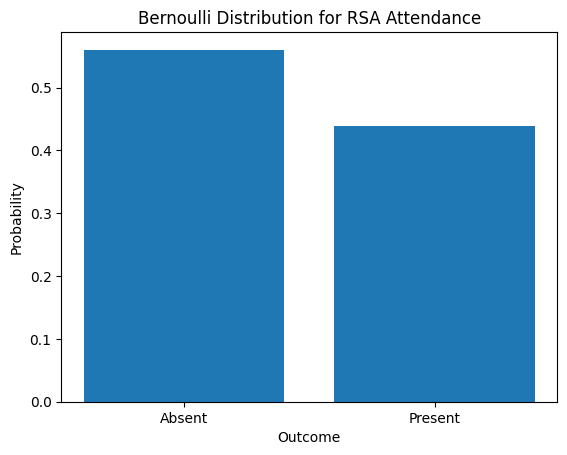

In [4]:
from scipy.stats import bernoulli
# create bernoulli distribtution for rsa

# define probability of success
p = series.mean()

# calculate pmp values for outcomes 0 and 1
pmf_values = bernoulli.pmf([0, 1], p)

# create a figure and axis
plt.bar([0, 1], pmf_values, tick_label=['Absent', 'Present'])
plt.title('Bernoulli Distribution for RSA Attendance')
plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.show()

### Review Demographic Data
Demographics: DEM<br>
Data includes response to questions about gender, race and ethnicity<br>
Data includes 12 different responses<br>
Data collected at baseline assessment<br>

<br>

|    | column                    | value              |   count |   percentage |
|---:|:--------------------------|:-------------------|--------:|-------------:|
|  0 | dem_gender                | male               |    1283 |         0.67 |
|  1 | dem_gender                | female             |     631 |         0.33 |
|  3 | dem_ethnicity             | not_spanish_origin |    1579 |         0.82 |
|  4 | dem_ethnicity             | spanish_origin     |     328 |         0.17 |
|  7 | dem_race_no_answer        | 1.0                |       5 |         0    |
|  9 | dem_race_unknown          | 1.0                |       8 |         0    |
| 11 | dem_race_amer_ind         | 1.0                |      85 |         0.04 |
| 13 | dem_race_asian            | 1.0                |      29 |         0.02 |
| 15 | dem_race_black            | 1.0                |     233 |         0.12 |
| 17 | dem_race_pacific_islander | 1.0                |      12 |         0.01 |
| 18 | dem_race_white            | 1.0                |    1379 |         0.72 |
| 21 | dem_race_other            | 1.0                |     284 |         0.15 |

In [5]:
# This code creates an efficient table to view value_counts of the demographics data

# create the demographics dataframe
dem = data[[col for col in data.columns if col.startswith('dem_')]]

# call the helper function to extract the value counts and organize them into a table
result_df = helper.df_value_counts(dem)

# remove index row 2, 5 - these have mostly missing values and not useful for analysis
result_df = result_df.drop(result_df.index[[2,5]])

# remove values with 0.0 - these are the negative binary response, not useful for analysis
result_df = result_df[result_df['value'] != 0.0]

# display the table in markdown
display(Markdown(result_df.to_markdown()))


|    | column                    | value              |   count |   percentage |
|---:|:--------------------------|:-------------------|--------:|-------------:|
|  0 | dem_gender                | male               |    1283 |         0.67 |
|  1 | dem_gender                | female             |     631 |         0.33 |
|  3 | dem_ethnicity             | not_spanish_origin |    1579 |         0.82 |
|  4 | dem_ethnicity             | spanish_origin     |     328 |         0.17 |
|  7 | dem_race_no_answer        | 1.0                |       5 |         0    |
|  9 | dem_race_unknown          | 1.0                |       8 |         0    |
| 11 | dem_race_amer_ind         | 1.0                |      85 |         0.04 |
| 13 | dem_race_asian            | 1.0                |      29 |         0.02 |
| 15 | dem_race_black            | 1.0                |     233 |         0.12 |
| 17 | dem_race_pacific_islander | 1.0                |      12 |         0.01 |
| 18 | dem_race_white            | 1.0                |    1379 |         0.72 |
| 21 | dem_race_other            | 1.0                |     284 |         0.15 |

In [6]:
# separate the data into two groups based on the value
groups = ['gender', 'ethnicity','race']
for dem in groups:
    # create dataframe for each group, for rows that have dem in column
    globals()[dem] = result_df[result_df['column'].str.contains(dem)]
    # sort values by count in descending order
    globals()[dem] = globals()[dem].sort_values(by='count', ascending=False)
    # convert to markdown
    print(dem)
    display(Markdown(globals()[dem].to_markdown()))
    

gender


|    | column     | value   |   count |   percentage |
|---:|:-----------|:--------|--------:|-------------:|
|  0 | dem_gender | male    |    1283 |         0.67 |
|  1 | dem_gender | female  |     631 |         0.33 |

ethnicity


|    | column        | value              |   count |   percentage |
|---:|:--------------|:-------------------|--------:|-------------:|
|  3 | dem_ethnicity | not_spanish_origin |    1579 |         0.82 |
|  4 | dem_ethnicity | spanish_origin     |     328 |         0.17 |

race


|    | column                    |   value |   count |   percentage |
|---:|:--------------------------|--------:|--------:|-------------:|
| 18 | dem_race_white            |       1 |    1379 |         0.72 |
| 21 | dem_race_other            |       1 |     284 |         0.15 |
| 15 | dem_race_black            |       1 |     233 |         0.12 |
| 11 | dem_race_amer_ind         |       1 |      85 |         0.04 |
| 13 | dem_race_asian            |       1 |      29 |         0.02 |
| 17 | dem_race_pacific_islander |       1 |      12 |         0.01 |
|  9 | dem_race_unknown          |       1 |       8 |         0    |
|  7 | dem_race_no_answer        |       1 |       5 |         0    |

### Visualize Demographic Data

### Review UDS Data
Urine Drug Screen: UDS<br>
Drug test for 8 different drug classes, taken weekly for 24 weeks<br>
<br>

### Key Descriptive Stats
**Mean % positive test rate for each drug class per week**<br>
|       |   pro |   amp |   can |   ben |   mme |   oxy |   coc |   met |   opi |
|:------|------:|------:|------:|------:|------:|------:|------:|------:|------:|
| count | 25    | 25    | 25    | 25    | 25    | 25    | 25    | 25    | 25    |
| mean  |  0.53 |  0.55 |  0.63 |  0.59 |  0.74 |  0.55 |  0.67 |  0.56 |  0.71 |
| std   |  0.12 |  0.11 |  0.09 |  0.1  |  0.11 |  0.1  |  0.07 |  0.11 |  0.04 |
| min   |  0.04 |  0.1  |  0.25 |  0.21 |  0.26 |  0.15 |  0.4  |  0.12 |  0.65 |
| 25%   |  0.52 |  0.54 |  0.62 |  0.58 |  0.74 |  0.53 |  0.66 |  0.55 |  0.69 |
| 50%   |  0.56 |  0.58 |  0.66 |  0.62 |  0.77 |  0.58 |  0.68 |  0.59 |  0.71 |
| 75%   |  0.6  |  0.62 |  0.68 |  0.65 |  0.79 |  0.61 |  0.71 |  0.62 |  0.72 |
| max   |  0.64 |  0.65 |  0.72 |  0.69 |  0.82 |  0.65 |  0.73 |  0.66 |  0.85 |

**Mean count of positive tests for each drug class per week**<br>
|       |     pro |     amp |     can |     ben |     mme |     oxy |     coc |     met |     opi |
|:------|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|
| count |   25    |   25    |   25    |   25    |   25    |   25    |   25    |   25    |   25    |
| mean  | 1020.64 | 1061.4  | 1213.2  | 1138.48 | 1428.56 | 1052.52 | 1280.08 | 1073.6  | 1357.8  |
| std   |  231.7  |  216.64 |  180.57 |  192.47 |  214.07 |  199.41 |  135.54 |  212.59 |   77.19 |
| min   |   83    |  190    |  480    |  403    |  491    |  282    |  762    |  223    | 1238    |
| 25%   |  996    | 1039    | 1193    | 1107    | 1424    | 1023    | 1257    | 1050    | 1314    |
| 50%   | 1080    | 1115    | 1262    | 1192    | 1483    | 1105    | 1309    | 1124    | 1360    |
| 75%   | 1147    | 1182    | 1306    | 1254    | 1521    | 1166    | 1361    | 1188    | 1380    |
| max   | 1223    | 1254    | 1371    | 1315    | 1576    | 1239    | 1407    | 1267    | 1638    |

### Data Visualization
This data is very complex, where we will have to pre-process the data<br>
to get meaningful visualizations.<br>
<br>
We will take the following steps to visual patient test data during treatment.
1. Create a test dataframe: Will contain 227 columns, representing 9 drug tests<br>
taken every week for 24 weeks.
2. Extract relevant text fields from the dataset for plotting
3. Create a plot dataframe that has a series with the % test rate for each drug<br>
4. Creat a workflow to automate plot rendering for 9 drug tests
5. Plot will be annotated with key insights to help the user learn them immediately<br>




Series created for each drug class:
pro created with shape of: (25, 1)
amp created with shape of: (25, 1)
can created with shape of: (25, 1)
ben created with shape of: (25, 1)
mme created with shape of: (25, 1)
oxy created with shape of: (25, 1)
coc created with shape of: (25, 1)
met created with shape of: (25, 1)
opi created with shape of: (25, 1)
Series created for each drug class:

drug_tests Dataframe:  Positive test rate per drug class


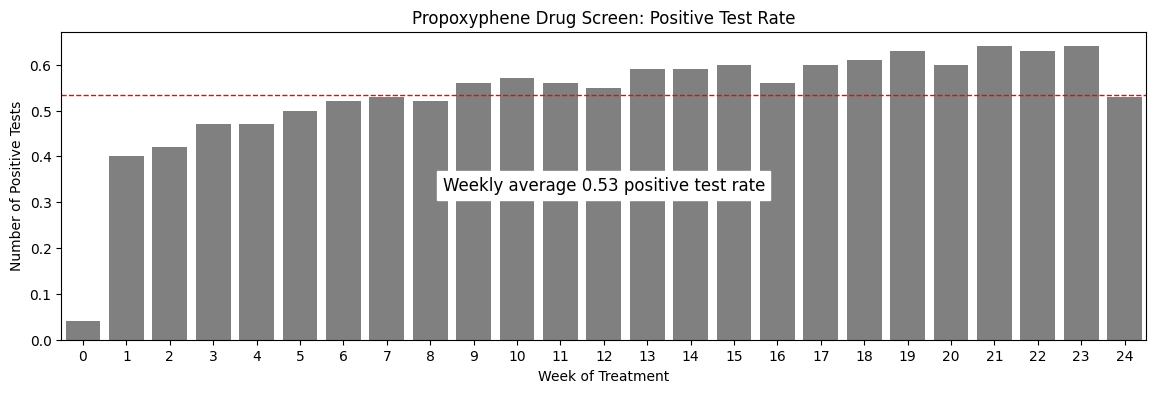

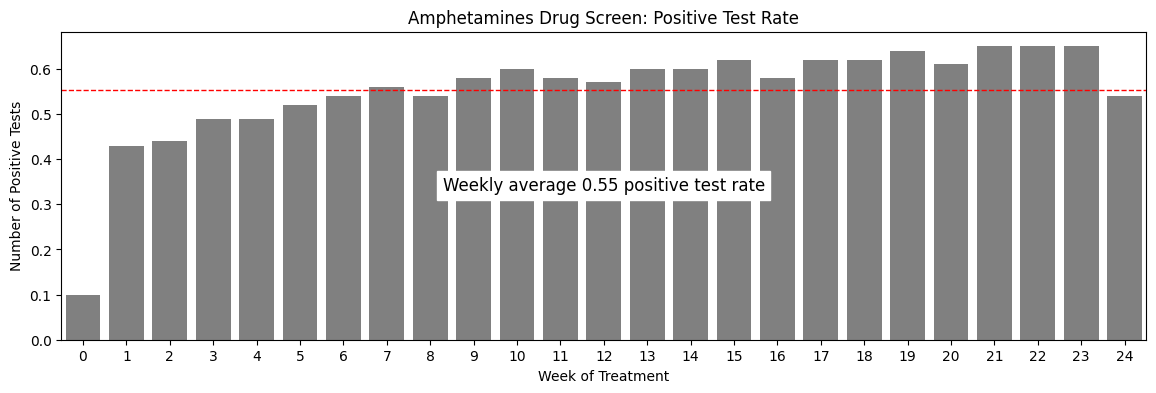

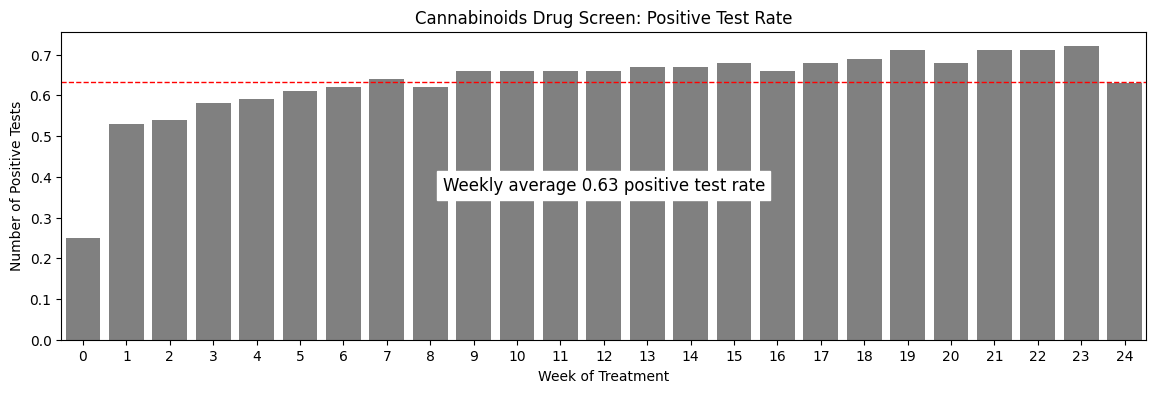

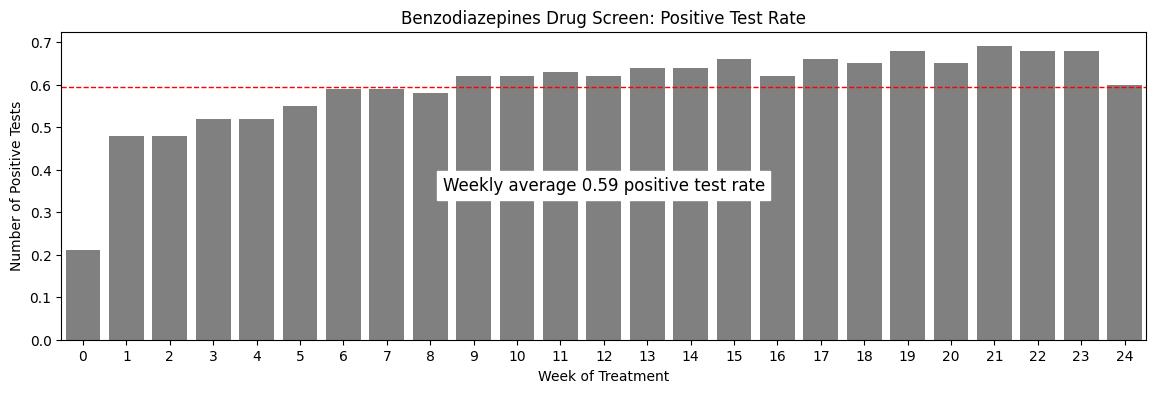

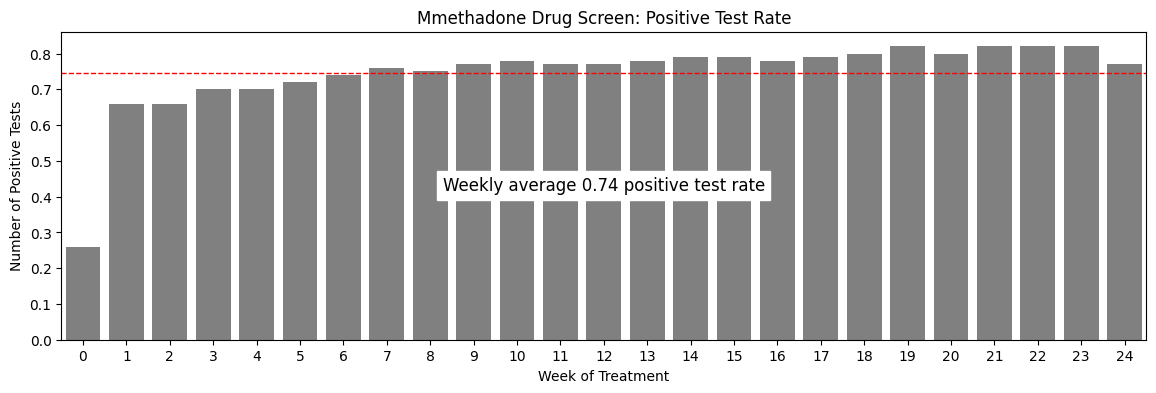

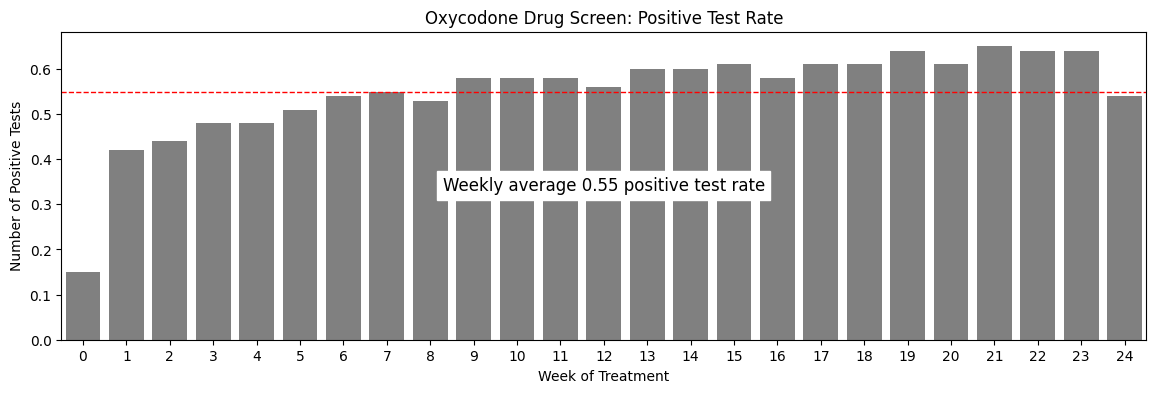

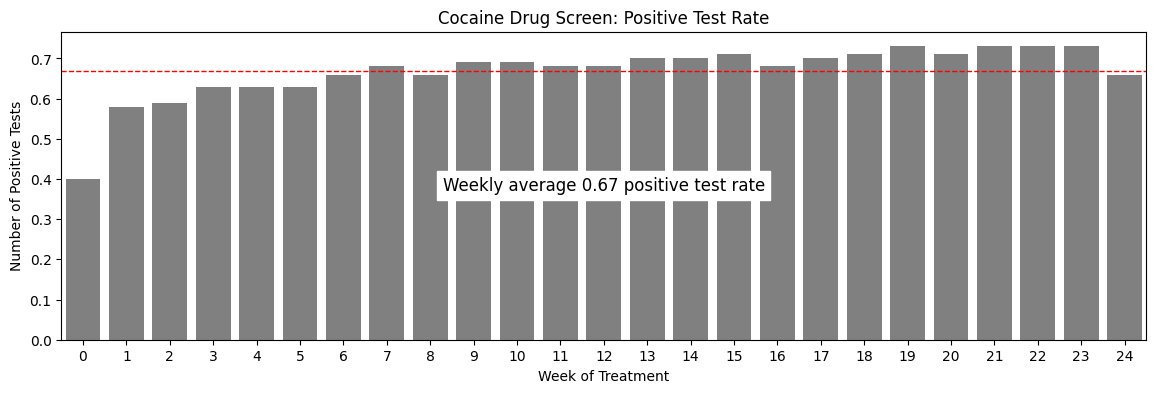

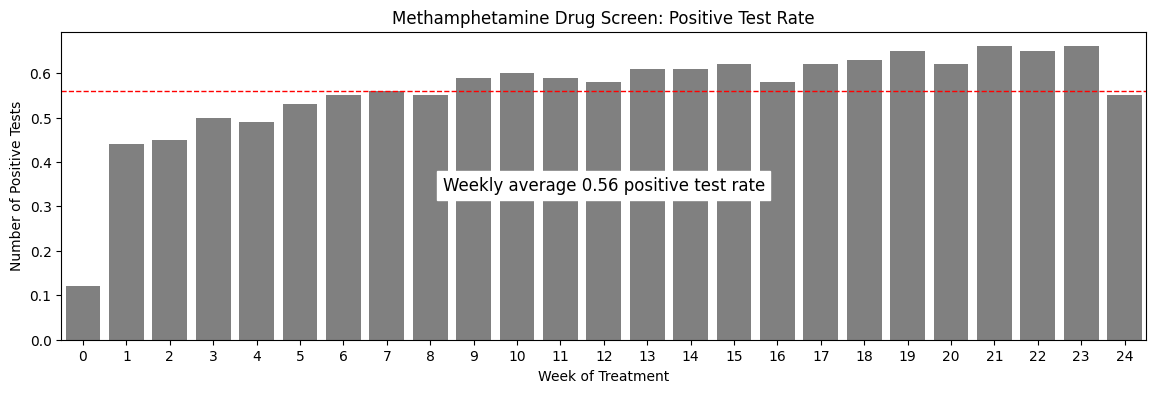

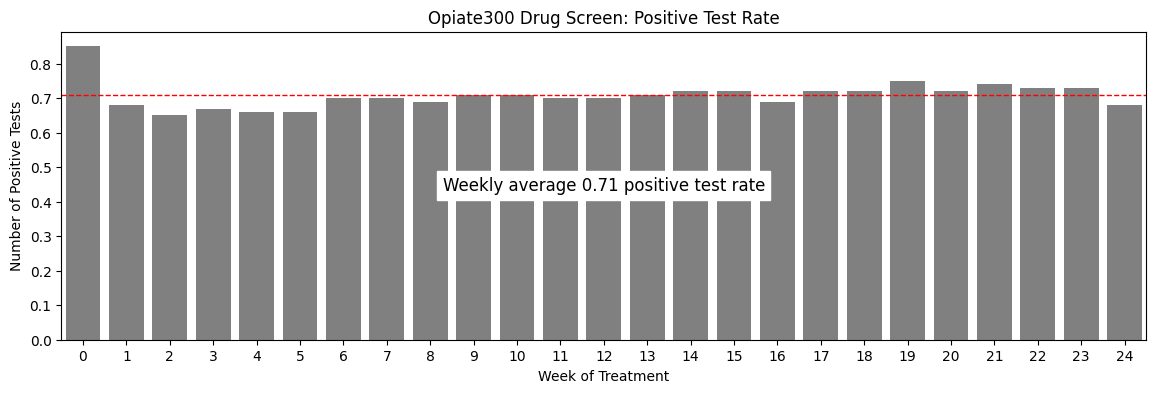

In [7]:
test_df, drug_dict = helper.agg_weekly_data(data, group='test_', agg='mean')

### Create a Markdown Table with Descriptive Statistics
- We will cover both the positive test rate and count of positive tests<br>

In [8]:
# create descriptive stats for drug tests
drug_tests_pos_count = test_df.describe().round(2)

# convert to markdown for portability
drug_tests_pos_count.to_markdown()

# display markdown table through ipython display
display(Markdown(drug_tests_pos_count.to_markdown()))

|       |   pro |   amp |   can |   ben |   mme |   oxy |   coc |   met |   opi |
|:------|------:|------:|------:|------:|------:|------:|------:|------:|------:|
| count | 25    | 25    | 25    | 25    | 25    | 25    | 25    | 25    | 25    |
| mean  |  0.53 |  0.55 |  0.63 |  0.59 |  0.74 |  0.55 |  0.67 |  0.56 |  0.71 |
| std   |  0.12 |  0.11 |  0.09 |  0.1  |  0.11 |  0.1  |  0.07 |  0.11 |  0.04 |
| min   |  0.04 |  0.1  |  0.25 |  0.21 |  0.26 |  0.15 |  0.4  |  0.12 |  0.65 |
| 25%   |  0.52 |  0.54 |  0.62 |  0.58 |  0.74 |  0.53 |  0.66 |  0.55 |  0.69 |
| 50%   |  0.56 |  0.58 |  0.66 |  0.62 |  0.77 |  0.58 |  0.68 |  0.59 |  0.71 |
| 75%   |  0.6  |  0.62 |  0.68 |  0.65 |  0.79 |  0.61 |  0.71 |  0.62 |  0.72 |
| max   |  0.64 |  0.65 |  0.72 |  0.69 |  0.82 |  0.65 |  0.73 |  0.66 |  0.85 |

### Review DSM Data
DSM provides the guidlines for diagnosing mental illness.<br>
DSM diagnosis is collected at baseline assesment<br>
The patient can have 3 different values for diagnosis for 6 drug classes:<br>
- Abuse
- Dependence
- No Diagnosis

<br>
The tables will be grouped by diagnosis to produce insights to the reader immediately<br>
<br>

**Abuse**
|    | column          | value   |   count |   percentage |
|---:|:----------------|:--------|--------:|-------------:|
| 21 | dsm_alcohol     | abuse   |     262 |         0.14 |
|  2 | dsm_cannabis    | abuse   |     218 |         0.11 |
|  8 | dsm_cocaine     | abuse   |     185 |         0.1  |
| 12 | dsm_sedative    | abuse   |     123 |         0.06 |
| 26 | dsm_amphetamine | abuse   |     109 |         0.06 |
| 18 | dsm_opiates     | abuse   |       1 |         0    |

**Dependence**
|    | column          | value      |   count |   percentage |
|---:|:----------------|:-----------|--------:|-------------:|
| 15 | dsm_opiates     | dependence |    1486 |         0.78 |
|  7 | dsm_cocaine     | dependence |     305 |         0.16 |
| 22 | dsm_alcohol     | dependence |     102 |         0.05 |
| 13 | dsm_sedative    | dependence |      90 |         0.05 |
|  3 | dsm_cannabis    | dependence |      73 |         0.04 |
| 27 | dsm_amphetamine | dependence |      67 |         0.03 |

**No Diagnosis**
 |    | column          | value        |   count |   percentage |
|---:|:----------------|:-------------|--------:|-------------:|
| 24 | dsm_amphetamine | no_diagnosis |    1311 |         0.68 |
| 10 | dsm_sedative    | no_diagnosis |    1274 |         0.66 |
|  0 | dsm_cannabis    | no_diagnosis |    1196 |         0.62 |
| 19 | dsm_alcohol     | no_diagnosis |    1123 |         0.59 |
|  5 | dsm_cocaine     | no_diagnosis |     997 |         0.52 |

In [9]:
# This is the code that creates the markdown table above

# get the columns for the dsm data
dsm = data[[col for col in data.columns if col.startswith('dsm_')]]

# call helper function to extract the value counts and organize them into a table
dsm_vc = helper.df_value_counts(dsm)

# convert to markdown
dsm_vc.to_markdown()

# display markdown table through ipython display
display(Markdown(dsm_vc.to_markdown()))


|    | column          | value         |   count |   percentage |
|---:|:----------------|:--------------|--------:|-------------:|
|  0 | dsm_cannabis    | no_diagnosis  |    1196 |         0.62 |
|  1 | dsm_cannabis    | not_present   |     399 |         0.21 |
|  2 | dsm_cannabis    | abuse         |     218 |         0.11 |
|  3 | dsm_cannabis    | dependence    |      73 |         0.04 |
|  4 | dsm_cannabis    | not_evaluated |      31 |         0.02 |
|  5 | dsm_cocaine     | no_diagnosis  |     997 |         0.52 |
|  6 | dsm_cocaine     | not_present   |     399 |         0.21 |
|  7 | dsm_cocaine     | dependence    |     305 |         0.16 |
|  8 | dsm_cocaine     | abuse         |     185 |         0.1  |
|  9 | dsm_cocaine     | not_evaluated |      31 |         0.02 |
| 10 | dsm_sedative    | no_diagnosis  |    1274 |         0.66 |
| 11 | dsm_sedative    | not_present   |     399 |         0.21 |
| 12 | dsm_sedative    | abuse         |     123 |         0.06 |
| 13 | dsm_sedative    | dependence    |      90 |         0.05 |
| 14 | dsm_sedative    | not_evaluated |      31 |         0.02 |
| 15 | dsm_opiates     | dependence    |    1486 |         0.78 |
| 16 | dsm_opiates     | not_present   |     399 |         0.21 |
| 17 | dsm_opiates     | not_evaluated |      31 |         0.02 |
| 18 | dsm_opiates     | abuse         |       1 |         0    |
| 19 | dsm_alcohol     | no_diagnosis  |    1123 |         0.59 |
| 20 | dsm_alcohol     | not_present   |     399 |         0.21 |
| 21 | dsm_alcohol     | abuse         |     262 |         0.14 |
| 22 | dsm_alcohol     | dependence    |     102 |         0.05 |
| 23 | dsm_alcohol     | not_evaluated |      31 |         0.02 |
| 24 | dsm_amphetamine | no_diagnosis  |    1311 |         0.68 |
| 25 | dsm_amphetamine | not_present   |     399 |         0.21 |
| 26 | dsm_amphetamine | abuse         |     109 |         0.06 |
| 27 | dsm_amphetamine | dependence    |      67 |         0.03 |
| 28 | dsm_amphetamine | not_evaluated |      31 |         0.02 |

In [10]:
# reogroup the data into three tables to make it easier to read

# create list of group, each group will be a separate table
diagnosis = ['abuse', 'dependence', 'no_diagnosis']

# iterate through each diagnosis
for disorder in diagnosis:
    # create a dataframe for each disorder
    globals()[disorder] = dsm_vc[dsm_vc['value']==disorder]
    # sort values by count in descending order
    globals()[disorder] = globals()[disorder].sort_values(by='count', ascending=False)
    # convert to markdown
    globals()[disorder].to_markdown()
    # print the disorder before the ipython display
    print(disorder)
    display(Markdown(globals()[disorder].to_markdown()))
    

abuse


|    | column          | value   |   count |   percentage |
|---:|:----------------|:--------|--------:|-------------:|
| 21 | dsm_alcohol     | abuse   |     262 |         0.14 |
|  2 | dsm_cannabis    | abuse   |     218 |         0.11 |
|  8 | dsm_cocaine     | abuse   |     185 |         0.1  |
| 12 | dsm_sedative    | abuse   |     123 |         0.06 |
| 26 | dsm_amphetamine | abuse   |     109 |         0.06 |
| 18 | dsm_opiates     | abuse   |       1 |         0    |

dependence


|    | column          | value      |   count |   percentage |
|---:|:----------------|:-----------|--------:|-------------:|
| 15 | dsm_opiates     | dependence |    1486 |         0.78 |
|  7 | dsm_cocaine     | dependence |     305 |         0.16 |
| 22 | dsm_alcohol     | dependence |     102 |         0.05 |
| 13 | dsm_sedative    | dependence |      90 |         0.05 |
|  3 | dsm_cannabis    | dependence |      73 |         0.04 |
| 27 | dsm_amphetamine | dependence |      67 |         0.03 |

no_diagnosis


|    | column          | value        |   count |   percentage |
|---:|:----------------|:-------------|--------:|-------------:|
| 24 | dsm_amphetamine | no_diagnosis |    1311 |         0.68 |
| 10 | dsm_sedative    | no_diagnosis |    1274 |         0.66 |
|  0 | dsm_cannabis    | no_diagnosis |    1196 |         0.62 |
| 19 | dsm_alcohol     | no_diagnosis |    1123 |         0.59 |
|  5 | dsm_cocaine     | no_diagnosis |     997 |         0.52 |

### Review MDH: Medical and Psychiatric History Data
Medical and Psychiatric History: MDH<br>
Tracks medical and psychiatric history of 18 different Conditions<br>
With 3 possible responses for each condition:<br>
<br>

### Descriptive Statistics
There are 54 features to evaluate.<br>
Please contiue to scroll to review statistics for each patient history group<br>

In [11]:
# create a new dataframe for the mdh data
mdh = data[[col for col in data.columns if col.startswith('mdh_')]]

# call helper function to extract the value counts and organize them into a table
mdh_vc = helper.df_value_counts(mdh)

# convert to markdown
mdh_vc.to_markdown()

print('mdh dataset shape:',mdh_vc.shape)
display(Markdown(mdh_vc.to_markdown()))

mdh dataset shape: (54, 4)


|    | column                        | value         |   count |   percentage |
|---:|:------------------------------|:--------------|--------:|-------------:|
|  0 | mdh_liver_problems            | no_history    |    1074 |         0.56 |
|  1 | mdh_liver_problems            | yes_history   |     570 |         0.3  |
|  2 | mdh_liver_problems            | not_evaluated |     273 |         0.14 |
|  3 | mdh_kidney_problems           | no_history    |    1525 |         0.8  |
|  4 | mdh_kidney_problems           | not_evaluated |     272 |         0.14 |
|  5 | mdh_kidney_problems           | yes_history   |     120 |         0.06 |
|  6 | mdh_alc_withdrawal            | no_history    |    1514 |         0.79 |
|  7 | mdh_alc_withdrawal            | not_evaluated |     272 |         0.14 |
|  8 | mdh_alc_withdrawal            | yes_history   |     131 |         0.07 |
|  9 | mdh_schizophrenia             | no_history    |    1591 |         0.83 |
| 10 | mdh_schizophrenia             | not_evaluated |     273 |         0.14 |
| 11 | mdh_schizophrenia             | yes_history   |      53 |         0.03 |
| 12 | mdh_major_depressive_disorder | no_history    |    1181 |         0.62 |
| 13 | mdh_major_depressive_disorder | yes_history   |     465 |         0.24 |
| 14 | mdh_major_depressive_disorder | not_evaluated |     271 |         0.14 |
| 15 | mdh_bipolar_disorder          | no_history    |    1458 |         0.76 |
| 16 | mdh_bipolar_disorder          | not_evaluated |     273 |         0.14 |
| 17 | mdh_bipolar_disorder          | yes_history   |     186 |         0.1  |
| 18 | mdh_anxiety_disorder          | no_history    |    1132 |         0.59 |
| 19 | mdh_anxiety_disorder          | yes_history   |     513 |         0.27 |
| 20 | mdh_anxiety_disorder          | not_evaluated |     272 |         0.14 |
| 21 | mdh_sig_neurological_damage   | no_history    |    1474 |         0.77 |
| 22 | mdh_sig_neurological_damage   | not_evaluated |     276 |         0.14 |
| 23 | mdh_sig_neurological_damage   | yes_history   |     167 |         0.09 |
| 24 | mdh_allergies                 | no_history    |    1188 |         0.62 |
| 25 | mdh_allergies                 | yes_history   |     459 |         0.24 |
| 26 | mdh_allergies                 | not_evaluated |     270 |         0.14 |
| 27 | mdh_gi_problems               | no_history    |    1262 |         0.66 |
| 28 | mdh_gi_problems               | yes_history   |     384 |         0.2  |
| 29 | mdh_gi_problems               | not_evaluated |     271 |         0.14 |
| 30 | mdh_thyroid_problems          | no_history    |    1598 |         0.83 |
| 31 | mdh_thyroid_problems          | not_evaluated |     271 |         0.14 |
| 32 | mdh_thyroid_problems          | yes_history   |      48 |         0.03 |
| 33 | mdh_heart_condition           | no_history    |    1514 |         0.79 |
| 34 | mdh_heart_condition           | not_evaluated |     272 |         0.14 |
| 35 | mdh_heart_condition           | yes_history   |     131 |         0.07 |
| 36 | mdh_asthma                    | no_history    |    1400 |         0.73 |
| 37 | mdh_asthma                    | not_evaluated |     270 |         0.14 |
| 38 | mdh_asthma                    | yes_history   |     247 |         0.13 |
| 39 | mdh_hypertension              | no_history    |    1434 |         0.75 |
| 40 | mdh_hypertension              | not_evaluated |     271 |         0.14 |
| 41 | mdh_hypertension              | yes_history   |     212 |         0.11 |
| 42 | mdh_skin_disease              | no_history    |    1352 |         0.71 |
| 43 | mdh_skin_disease              | yes_history   |     294 |         0.15 |
| 44 | mdh_skin_disease              | not_evaluated |     271 |         0.14 |
| 45 | mdh_head_injury               | no_history    |    1208 |         0.63 |
| 46 | mdh_head_injury               | yes_history   |     437 |         0.23 |
| 47 | mdh_head_injury               | not_evaluated |     272 |         0.14 |
| 48 | mdh_opi_withdrawal            | yes_history   |    1405 |         0.73 |
| 49 | mdh_opi_withdrawal            | not_evaluated |     271 |         0.14 |
| 50 | mdh_opi_withdrawal            | no_history    |     241 |         0.13 |
| 51 | mdh_epilepsy                  | no_history    |    1576 |         0.82 |
| 52 | mdh_epilepsy                  | not_evaluated |     272 |         0.14 |
| 53 | mdh_epilepsy                  | yes_history   |      69 |         0.04 |

### Improve Readability
We will improve readability by breaking the data into 3 tables<br>
1. Patient Has History of Condition
2. Patient Does Not Have History of Condition
3. Patient Was Not Evaluated

In [12]:
# create list of group, each group will be a separate table
patient_history = ['yes_history', 'no_history', 'not_evaluated']

# iterate through each medical history group
for history in patient_history:
    # create a dataframe for each history group
    globals()[history] = mdh_vc[mdh_vc['value']==history]
    # convert to markdown
    globals()[history].to_markdown()
    # sort values by count in descending order
    globals()[history] = globals()[history].sort_values(by='count', ascending=False)

    # print the history group before the ipython display
    print(history)
    display(Markdown(globals()[history].to_markdown()))


yes_history


|    | column                        | value       |   count |   percentage |
|---:|:------------------------------|:------------|--------:|-------------:|
| 48 | mdh_opi_withdrawal            | yes_history |    1405 |         0.73 |
|  1 | mdh_liver_problems            | yes_history |     570 |         0.3  |
| 19 | mdh_anxiety_disorder          | yes_history |     513 |         0.27 |
| 13 | mdh_major_depressive_disorder | yes_history |     465 |         0.24 |
| 25 | mdh_allergies                 | yes_history |     459 |         0.24 |
| 46 | mdh_head_injury               | yes_history |     437 |         0.23 |
| 28 | mdh_gi_problems               | yes_history |     384 |         0.2  |
| 43 | mdh_skin_disease              | yes_history |     294 |         0.15 |
| 38 | mdh_asthma                    | yes_history |     247 |         0.13 |
| 41 | mdh_hypertension              | yes_history |     212 |         0.11 |
| 17 | mdh_bipolar_disorder          | yes_history |     186 |         0.1  |
| 23 | mdh_sig_neurological_damage   | yes_history |     167 |         0.09 |
| 35 | mdh_heart_condition           | yes_history |     131 |         0.07 |
|  8 | mdh_alc_withdrawal            | yes_history |     131 |         0.07 |
|  5 | mdh_kidney_problems           | yes_history |     120 |         0.06 |
| 53 | mdh_epilepsy                  | yes_history |      69 |         0.04 |
| 11 | mdh_schizophrenia             | yes_history |      53 |         0.03 |
| 32 | mdh_thyroid_problems          | yes_history |      48 |         0.03 |

no_history


|    | column                        | value      |   count |   percentage |
|---:|:------------------------------|:-----------|--------:|-------------:|
| 30 | mdh_thyroid_problems          | no_history |    1598 |         0.83 |
|  9 | mdh_schizophrenia             | no_history |    1591 |         0.83 |
| 51 | mdh_epilepsy                  | no_history |    1576 |         0.82 |
|  3 | mdh_kidney_problems           | no_history |    1525 |         0.8  |
| 33 | mdh_heart_condition           | no_history |    1514 |         0.79 |
|  6 | mdh_alc_withdrawal            | no_history |    1514 |         0.79 |
| 21 | mdh_sig_neurological_damage   | no_history |    1474 |         0.77 |
| 15 | mdh_bipolar_disorder          | no_history |    1458 |         0.76 |
| 39 | mdh_hypertension              | no_history |    1434 |         0.75 |
| 36 | mdh_asthma                    | no_history |    1400 |         0.73 |
| 42 | mdh_skin_disease              | no_history |    1352 |         0.71 |
| 27 | mdh_gi_problems               | no_history |    1262 |         0.66 |
| 45 | mdh_head_injury               | no_history |    1208 |         0.63 |
| 24 | mdh_allergies                 | no_history |    1188 |         0.62 |
| 12 | mdh_major_depressive_disorder | no_history |    1181 |         0.62 |
| 18 | mdh_anxiety_disorder          | no_history |    1132 |         0.59 |
|  0 | mdh_liver_problems            | no_history |    1074 |         0.56 |
| 50 | mdh_opi_withdrawal            | no_history |     241 |         0.13 |

not_evaluated


|    | column                        | value         |   count |   percentage |
|---:|:------------------------------|:--------------|--------:|-------------:|
| 22 | mdh_sig_neurological_damage   | not_evaluated |     276 |         0.14 |
|  2 | mdh_liver_problems            | not_evaluated |     273 |         0.14 |
| 10 | mdh_schizophrenia             | not_evaluated |     273 |         0.14 |
| 16 | mdh_bipolar_disorder          | not_evaluated |     273 |         0.14 |
| 47 | mdh_head_injury               | not_evaluated |     272 |         0.14 |
| 34 | mdh_heart_condition           | not_evaluated |     272 |         0.14 |
|  4 | mdh_kidney_problems           | not_evaluated |     272 |         0.14 |
| 52 | mdh_epilepsy                  | not_evaluated |     272 |         0.14 |
| 20 | mdh_anxiety_disorder          | not_evaluated |     272 |         0.14 |
|  7 | mdh_alc_withdrawal            | not_evaluated |     272 |         0.14 |
| 31 | mdh_thyroid_problems          | not_evaluated |     271 |         0.14 |
| 14 | mdh_major_depressive_disorder | not_evaluated |     271 |         0.14 |
| 40 | mdh_hypertension              | not_evaluated |     271 |         0.14 |
| 44 | mdh_skin_disease              | not_evaluated |     271 |         0.14 |
| 49 | mdh_opi_withdrawal            | not_evaluated |     271 |         0.14 |
| 29 | mdh_gi_problems               | not_evaluated |     271 |         0.14 |
| 26 | mdh_allergies                 | not_evaluated |     270 |         0.14 |
| 37 | mdh_asthma                    | not_evaluated |     270 |         0.14 |

### Create Visualization
Use the column (feature) name as x, with either count or percent as y<br>
Visualize the 3 different values as hue in a bar plot<br>

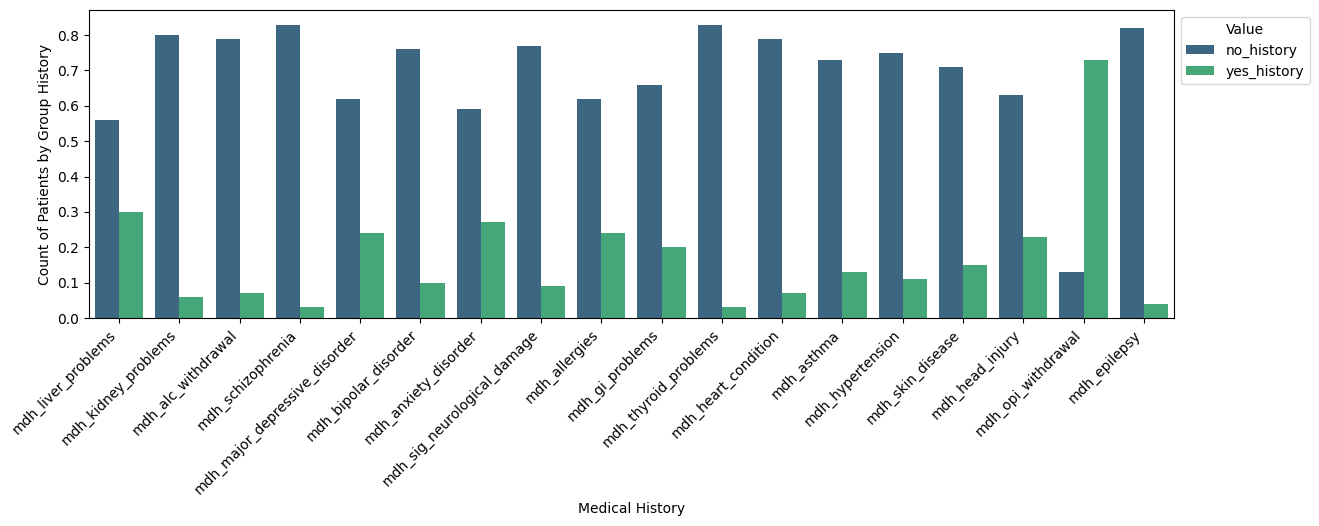

In [13]:
# filter df to remove not_evaluated group, as there is no variability in the data
filtered_df = mdh_vc[mdh_vc['value'].isin(['yes_history', 'no_history'])]

# visualize mdh_vc table
plt.figure(figsize=(14, 4))
sns.barplot(x='column', y='percentage', data=filtered_df, hue='value', palette='viridis')
plt.xticks(rotation=45, ha='right');
# move legend outside of plot
plt.legend(loc='upper left', bbox_to_anchor=(1,1), title='Value')
plt.ylabel('Count of Patients by Group History')
plt.xlabel('Medical History');

### Review PEX: Physical Exam Data
Physical Exam: PEX<br>
Tracks the appearance and condition of patients for 12 different physical observations<br>
<br>


In [14]:
# create pex table with value counts

# create df for pex data
pex = data[[col for col in data.columns if col.startswith('pex_')]]

# call helper function to extract the value counts and organize them into a table
pex_vc = helper.df_value_counts(pex)

pex_vc


,column,value,count,percentage
0,pex_lymph_nodes,normal,1467,0.77
1,pex_lymph_nodes,not_present,325,0.17
2,pex_lymph_nodes,not_evaluated,67,0.03
3,pex_lymph_nodes,abnormal,58,0.03
4,pex_other,not_present,1127,0.59
5,pex_other,not_evaluated,671,0.35
6,pex_other,normal,64,0.03
7,pex_other,abnormal,55,0.03
8,pex_respiratory,normal,1402,0.73
9,pex_respiratory,not_present,325,0.17


In [15]:

# create groups for evaluation status
evaluation = ['abnormal', 'normal', 'not_evaluated']

# iterate through each evaluation group
for status in evaluation:
    # create a dataframe for each evaluation group
    globals()[status] = pex_vc[pex_vc['value']==status]
    # convert to markdown
    globals()[status].to_markdown()
    # sort values by count in descending order
    globals()[status] = globals()[status].sort_values(by='count', ascending=False)
    # print the evaluation group before the ipython display
    print(status)
    display(Markdown(globals()[status].to_markdown()))


abnormal


|    | column               | value    |   count |   percentage |
|---:|:---------------------|:---------|--------:|-------------:|
| 44 | pex_skin             | abnormal |     826 |         0.43 |
| 33 | pex_ears_nose_throat | abnormal |     532 |         0.28 |
| 18 | pex_gi_system        | abnormal |     312 |         0.16 |
| 30 | pex_gen_appearance   | abnormal |     273 |         0.14 |
| 22 | pex_extremeties      | abnormal |     201 |         0.1  |
| 10 | pex_respiratory      | abnormal |     125 |         0.07 |
| 14 | pex_musculoskeletal  | abnormal |     117 |         0.06 |
| 42 | pex_cardio           | abnormal |      93 |         0.05 |
| 38 | pex_head_neck        | abnormal |      85 |         0.04 |
| 27 | pex_neurological     | abnormal |      64 |         0.03 |
|  3 | pex_lymph_nodes      | abnormal |      58 |         0.03 |
|  7 | pex_other            | abnormal |      55 |         0.03 |

normal


|    | column               | value   |   count |   percentage |
|---:|:---------------------|:--------|--------:|-------------:|
|  0 | pex_lymph_nodes      | normal  |    1467 |         0.77 |
| 24 | pex_neurological     | normal  |    1462 |         0.76 |
| 36 | pex_head_neck        | normal  |    1440 |         0.75 |
| 40 | pex_cardio           | normal  |    1433 |         0.75 |
| 12 | pex_musculoskeletal  | normal  |    1410 |         0.74 |
|  8 | pex_respiratory      | normal  |    1402 |         0.73 |
| 20 | pex_extremeties      | normal  |    1326 |         0.69 |
| 28 | pex_gen_appearance   | normal  |    1256 |         0.66 |
| 16 | pex_gi_system        | normal  |    1214 |         0.63 |
| 32 | pex_ears_nose_throat | normal  |     994 |         0.52 |
| 45 | pex_skin             | normal  |     693 |         0.36 |
|  6 | pex_other            | normal  |      64 |         0.03 |

not_evaluated


|    | column               | value         |   count |   percentage |
|---:|:---------------------|:--------------|--------:|-------------:|
|  5 | pex_other            | not_evaluated |     671 |         0.35 |
| 47 | pex_skin             | not_evaluated |      73 |         0.04 |
|  2 | pex_lymph_nodes      | not_evaluated |      67 |         0.03 |
| 39 | pex_head_neck        | not_evaluated |      67 |         0.03 |
| 19 | pex_gi_system        | not_evaluated |      66 |         0.03 |
| 26 | pex_neurological     | not_evaluated |      66 |         0.03 |
| 35 | pex_ears_nose_throat | not_evaluated |      66 |         0.03 |
| 43 | pex_cardio           | not_evaluated |      66 |         0.03 |
| 11 | pex_respiratory      | not_evaluated |      65 |         0.03 |
| 15 | pex_musculoskeletal  | not_evaluated |      65 |         0.03 |
| 23 | pex_extremeties      | not_evaluated |      65 |         0.03 |
| 31 | pex_gen_appearance   | not_evaluated |      63 |         0.03 |

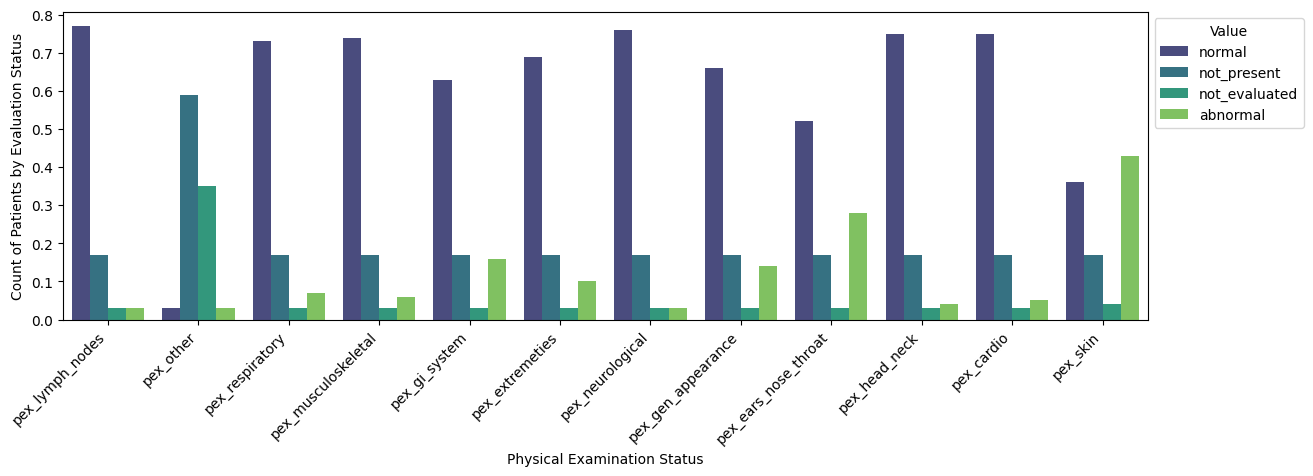

In [16]:
# visualize the pex_vc table
plt.figure(figsize=(14, 4))
sns.barplot(x='column', y='percentage', data=pex_vc, hue='value', palette='viridis')
plt.xticks(rotation=45, ha='right');
# move legend outside of plot
plt.legend(loc='upper left', bbox_to_anchor=(1,1), title='Value')
plt.ylabel('Count of Patients by Evaluation Status')
plt.xlabel('Physical Examination Status');


Series created for each drug class:
can created with shape of: (7, 1)
coc created with shape of: (7, 1)
alc created with shape of: (7, 1)
oxy created with shape of: (7, 1)
mme created with shape of: (7, 1)
amp created with shape of: (7, 1)
met created with shape of: (7, 1)
opi created with shape of: (7, 1)
ben created with shape of: (7, 1)
pro created with shape of: (7, 1)
Series created for each drug class:

drug_tests Dataframe:  Positive test rate per drug class


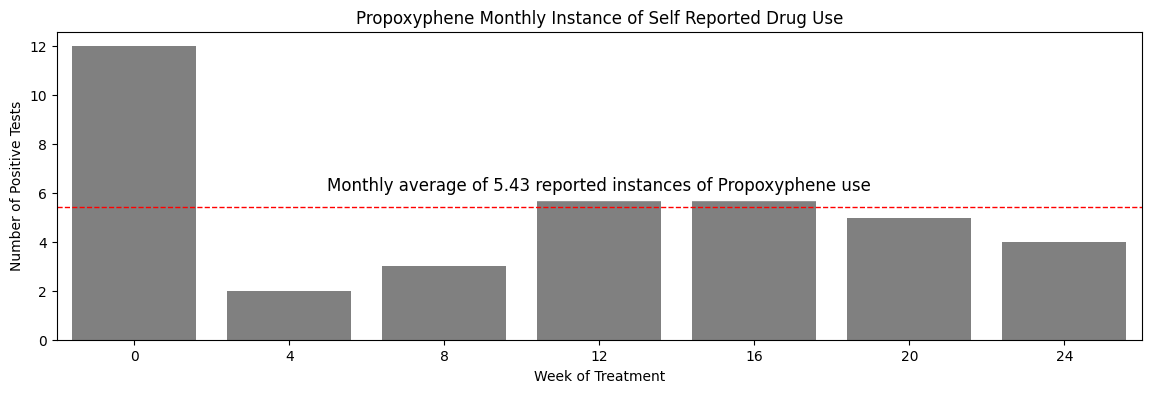

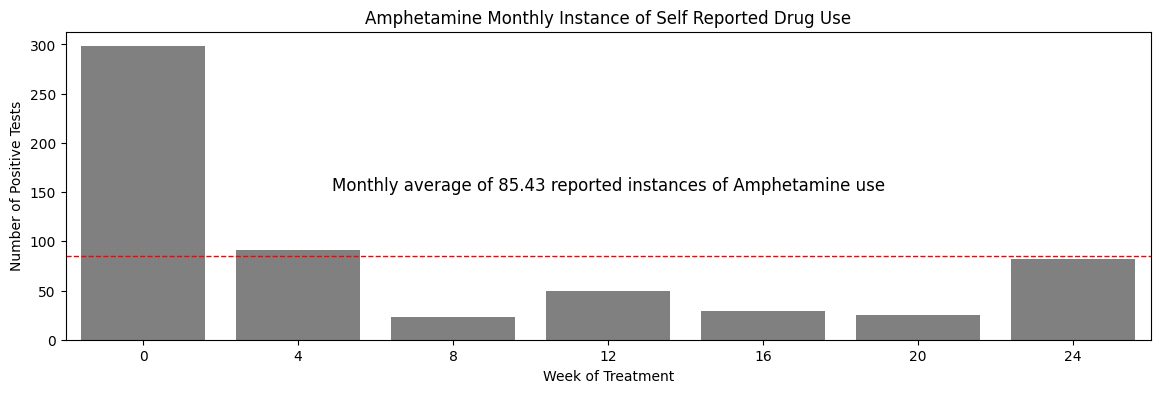

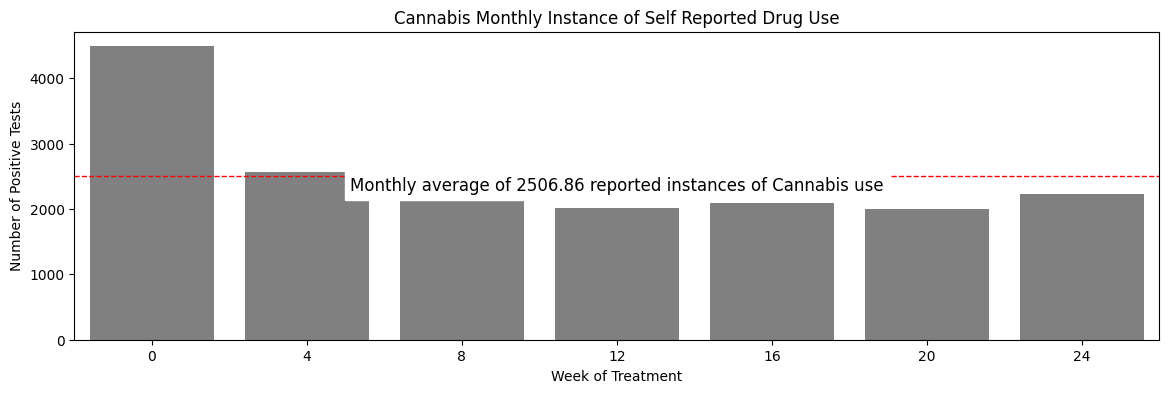

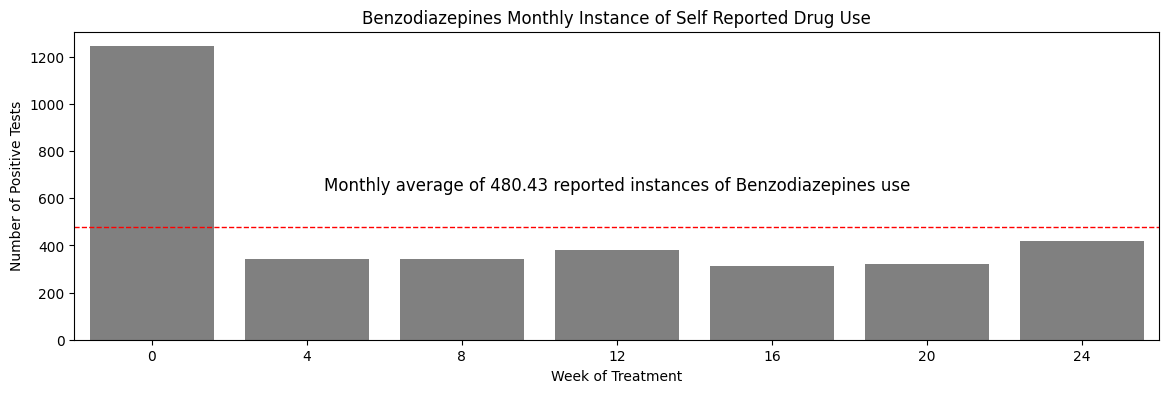

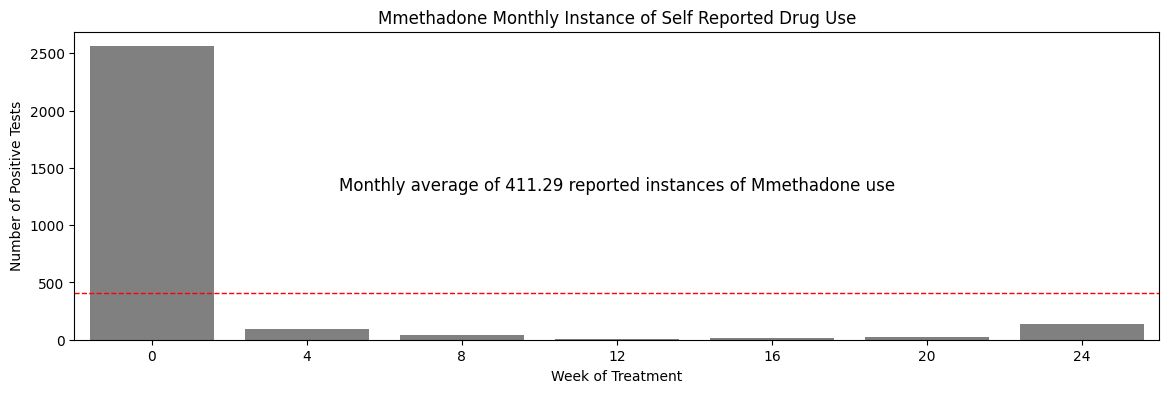

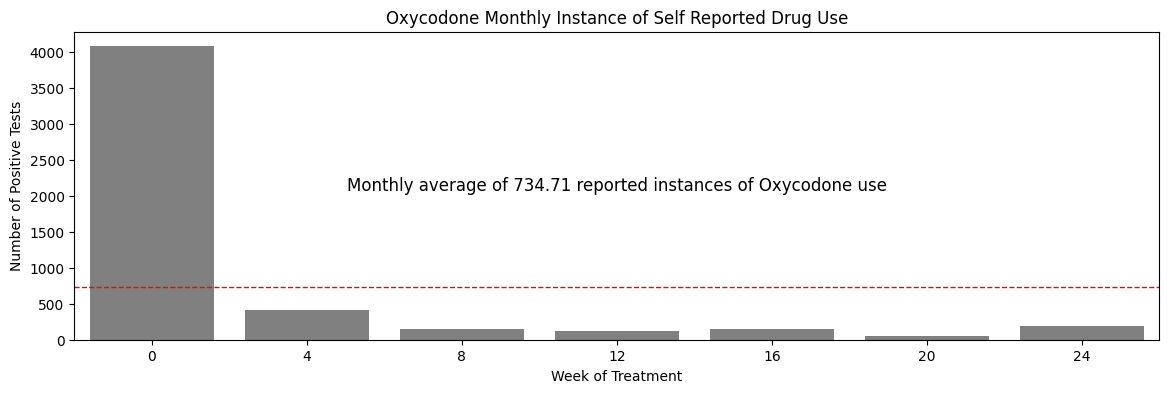

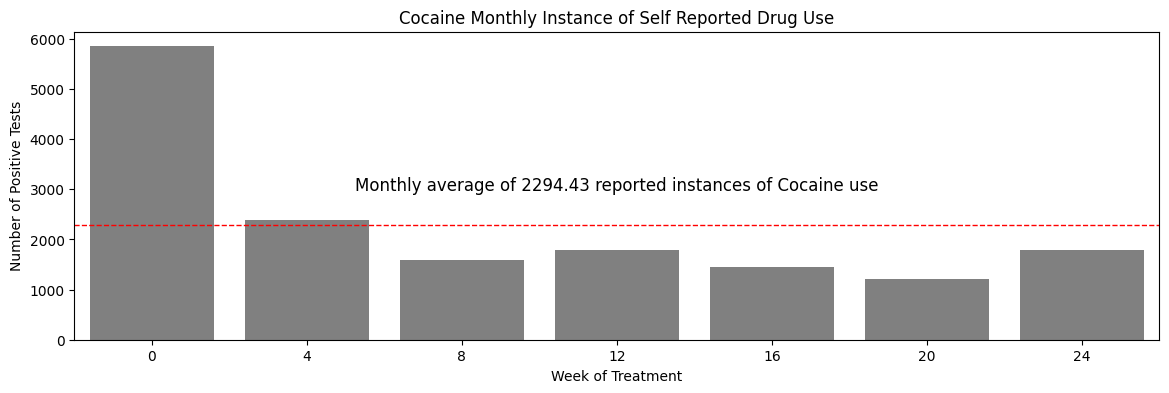

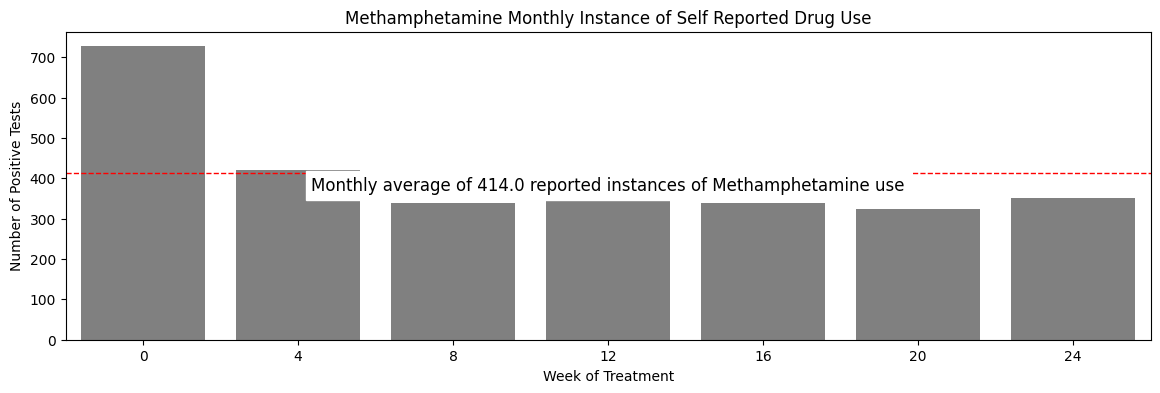

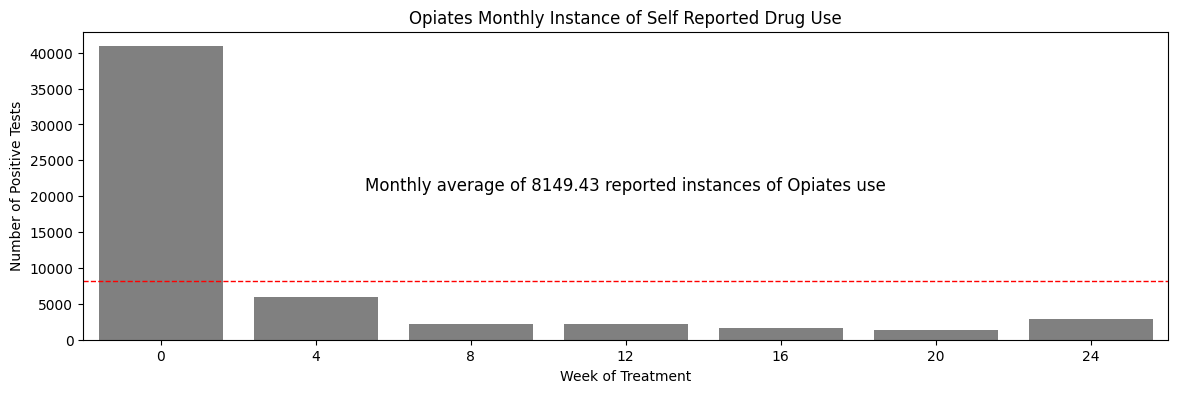

In [17]:
df, dict = helper.agg_weekly_data(data, group='survey_', agg='sum')

### clean the dose record
Dose Record: DOS<br>
Records the medication, averge weekly dose and week of treatment<br>
<br>


In [18]:
# create df for medication does
meds = data[[col for col in data.columns if col.startswith('meds_')]]

bupe = meds[[col for col in meds.columns if 'buprenorphine' in col]]

meth = meds[[col for col in meds.columns if 'methadone' in col]]

# Correct approach to modify column names
bupe.columns = [col.split('_')[-1] for col in bupe.columns]
meth.columns = [col.split('_')[-1] for col in meth.columns]

# create series and merge for plotting
bupe = bupe.mean().round(2).to_frame('buprenorphine')
meth = meth.mean().round(2).to_frame('methadone')

# merge
meds = pd.concat([bupe, meth], axis=1)



meds




,buprenorphine,methadone
0,12.01,30.96
1,55.35,129.01
2,56.57,164.81
3,50.69,163.48
4,55.34,183.73
5,49.01,185.11
6,46.00,184.96
7,44.47,193.09
8,46.27,200.29
9,40.33,194.35


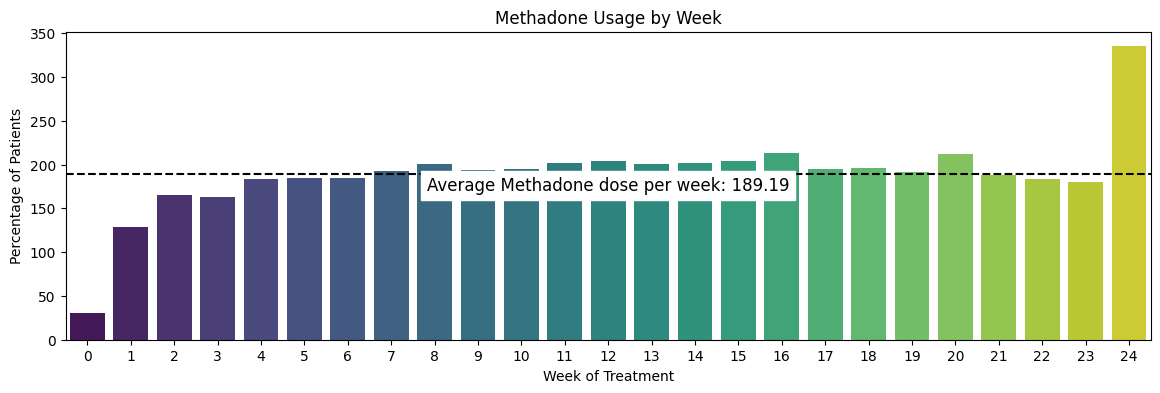

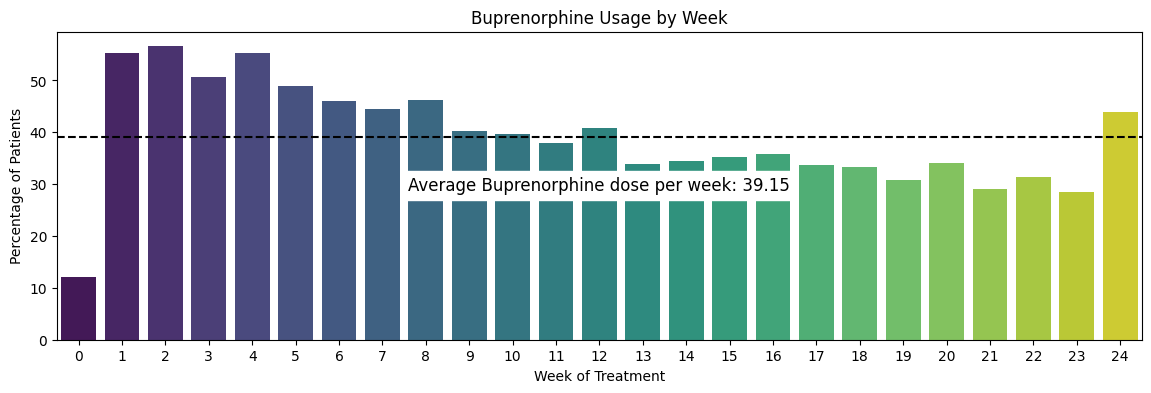

In [19]:
# set plot params
med_options = ['methadone', 'buprenorphine']
for i,med in enumerate(med_options):
    # create separate bar plot for each med
    plt.figure(figsize=(14, 4))
    sns.barplot(x=meds.index, y=meds[med], palette='viridis')
    plt.ylabel('Percentage of Patients')
    plt.xlabel('Week of Treatment')
    plt.title(f'{med.capitalize()} Usage by Week')
    plt.axhline(y=meds[med].mean(), color='black', linestyle='--', label=f'Average {med.capitalize()} Usage')
    plt.annotate(
        f"Average {med.capitalize()} dose per week: {meds[med].mean().round(2)}",
        xy=(0.5, 0.5),
        xycoords="axes fraction",
        ha="center",
        va="center",
        fontsize=12,
        color="black",
        backgroundcolor='white'
    );

